## Portfolio Optimaization Using Genetic Algorithm 

### Problem Statement:

Consider we have N financial assets that we want to invest in. Each one of the assets has many historical returns, that's the diffrence from one period to another one. This period can be days, weeks, monthes and so on. Build an investment portfolio with a mix of them, using fractions of our total capital we call weights. The goal of PO is to find a value of the weights that maximizes returns and minimizes risk simultaneously of our portfolio under some asset. 

#### Data:
We have Monthly Closing Stock values of ITC, HDFC, M&M, Sun Pharma, L&T, and TCS form June 2015 to June 2018 


### Tasks:
1. Read th data and make a dataframe.

2. Consider 3, 6, 12, 24, 36 months period and calculate the historical returns for Each of the stocks.

3. Define **Gene**: A fraction of the total capital assigned to a stock. 

4. Define **Choromosome**: Set of genes(1D array). *Notice!* Sum of each choromosome should be equal to 1.

5. Generate **Initial Population**: A set of randomly generated choromosomes(2D Array).

6. **Fitness Function**: The **Sharpe ratio**, S, is a measure for quantifying the perfomnace of the portfolio which works on "Maximisation of return (mean) and minimisation of risk (Variance) simultaneosly" and is computed as follows:

                             S = (µ - r)/σ
    
    Here µ is the return of the portfolio over a specified period or Mean portfolio return, 
        r is the risk-free rate over the same period and σ is the standard deviation of the returns over the spwcified period or Standard deviation of the portfolio return.

        µ = Mean Return * Fractions of Total Capital (Chromosome). 

        r = 0.0697 for more emphasis on risk minimization and 0.2 for more emphasis on returns maximization
    
        σ = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome. 

7. Select **Elite Population**: Filters the elite choromoome which have highest returns, witch was calculated in fitness function.

8. **Mutation**: Randomly we shall Choose 2 numbers between 0, 5 and those elements we shall swap.

9. **Crossover**: 

    - Using **Blend CrossOver** that uses fitness values of two parents choromosome to ascertain the direction of the search. it moves from worst parent to best parent.

    The offspring are created acoording to the equation:

                OffSpring_A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
                Offspring_B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
    Where β is a random number between 0 and 1.
    
    - Using a slighlty different version of the crossover above we can use the Arithmetic crossover:
                
                OffSpring_A = α * Parent_A + (1-α) * Parent_B
                Offspring_B = α * Parent_B + (1-α) * Parent_A

10. **Next Generation**: A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.

11. **Itration**: Iterate the wole process untill their is no change in muximun returns of for fixed number of iterations.



#### Needed Library:



In [1]:
import numpy as np 
import pandas as pd 
from functools import reduce
import matplotlib.pyplot as plt
import time 

### Task 1: 
Read data and make a dataframe.

In [2]:
files=['hdfc.csv','itc.csv','l&t.csv','m&m.csv','sunpha.csv','tcs.csv']
dfs=[]

for file in files:
    temp=pd.read_csv("Stocks_Data/"+file)
    temp.columns=['Date',file.replace('.csv','')]
    dfs.append(temp)

In [3]:
stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
print(stocks.shape)
stocks

(37, 7)


,Date,hdfc,itc,l&t,m&m,sunpha,tcs
0,June 2018,2108.05,266.05,1271.30,896.80,560.55,1847.20
1,May 2018,2136.15,271.60,1367.60,923.50,480.15,1744.80
2,Apr 2018,1944.60,281.45,1400.60,872.65,528.15,1765.70
3,Mar 2018,1891.45,255.90,1311.90,740.20,495.40,1424.65
4,Feb 2018,1883.80,265.10,1319.10,728.75,535.35,1519.13
5,Jan 2018,2006.35,271.25,1416.60,763.45,579.35,1555.88
6,Dec 2017,1873.55,263.10,1256.95,751.05,570.80,1350.20
7,Nov 2017,1852.05,255.65,1216.85,705.25,539.95,1317.13
8,Oct 2017,1808.80,266.10,1220.60,672.50,553.40,1308.15
9,Sep 2017,1803.05,258.25,1141.20,626.88,503.20,1218.50


### Task 2: 
Consider 3, 6, 12, 24, 36 months period and calculate the historical returns for Each of the stocks.

        Stock Return =  (appreciation in the price + any dividends paid) / orginal price of the stock

#### hist_return:
 function calculates Stock returns for various months and  returns a dataframe.

**Input**: Months in the form of a list.
        
**Output**: Historical returns in the form of a DataFrame.

In [4]:
def hist_return(months):
    idx=[]
    df=pd.DataFrame()
    for mon in months:
        temp=(stocks.iloc[0,1:] - stocks.iloc[mon,1:])/(stocks.iloc[mon,1:])
        idx.append(str(mon)+' Month Return')
        df=pd.concat([df, temp.to_frame().T], ignore_index=True)
    df.index=idx
    return df   

In [5]:
hist_stock_returns=hist_return([3,6,12,24,36])
hist_stock_returns

,hdfc,itc,l&t,m&m,sunpha,tcs
3 Month Return,0.114515,0.039664,-0.030947,0.211564,0.13151,0.296599
6 Month Return,0.125163,0.011212,0.011417,0.194062,-0.017957,0.368094
12 Month Return,0.275866,-0.178478,0.129783,0.330899,0.010911,0.562537
24 Month Return,0.792712,0.084237,0.274461,0.255179,-0.265911,0.44833
36 Month Return,0.974847,0.266844,0.069614,0.399938,-0.358785,0.447535


### Task 3: Define **Gene**
A fraction of the total capital assigned to a stock.

*Gene can be a fractional value between 0 to 1, such as 0.56 of HDFC or 0.21 of ITC or 0.32 TCS.*

In [6]:
gene = np.random.rand()
gene

0.1641480477977344

#### gen_mc_grid_with_NA_loc:
generate monte carlo wind farm layout grids.

**Input**: Rows of layout, Columns of Layout, n, N, NA Loc

**Output**: Layouts, Layouts_NA

In [7]:
def gen_mc_grid_with_NA_loc(rows, cols, n, N,NA_loc): 
        np.random.seed(seed=int(time.time()))  # init random seed
        layouts = np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout, NA loc is 0
        layouts_NA= np.zeros((n, rows * cols), dtype=np.int32)  # one row is a layout, NA loc is 2
        for i in NA_loc:
            layouts_NA[:,i-1]=2
        positionX = np.random.randint(0, cols, size=(N * n * 2))
        positionY = np.random.randint(0, rows, size=(N * n * 2))
        ind_rows = 0  # index of layouts from 0 to n-1
        ind_pos = 0  # index of positionX, positionY from 0 to N*n*2-1
        N_count=0
        while ind_rows < n:
            cur_state=layouts_NA[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols]
            if cur_state!=1 and cur_state!=2:
                layouts[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols]=1
                layouts_NA[ind_rows, positionX[ind_pos] + positionY[ind_pos] * cols] = 1
                N_count+=1
                if np.sum(layouts[ind_rows, :]) == N:
                    ind_rows += 1
                    N_count=0
            ind_pos += 1
            if ind_pos >= N * n * 2:
                print("Not enough positions")
                break
        return layouts,layouts_NA

In [8]:
gen_loc = gen_mc_grid_with_NA_loc(5, 5, 100, 50,range(10))
print("Layouts:")
for g in gen_loc[0]:
    print(g)
print("\nLayouts_NA:")
for g in gen_loc[1]:
    print(g)

Not enough positions
Layouts:
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

### Task 4: Define **Choromosome**
Set of genes(1D array). 

As we have 6 company stocks, we shall generate 6 fractional values (genes) which constitues 1 chromosome.

**Why sum should be equal to 1?** 

Because we consider total captial to be 1 unit so each gene of chromosome is fraction of the total captial

**How to make sure sum =1?** 

Just generate 6 random numbers and then calculate a factor which is

                1 / [sum of random numbers] 
Finally multiply each of the random numbers with that factor. The sum will be 1.

#### chromosome:
Generates set of random numbers whose sum is equal to 1.

**Input**: Number of stocks.

**Output**: Array of random numbers



In [9]:
def chromosome(n, a = -1, b = 1):
    ch = np.random.uniform(a, b, n)
    while (np.sum(ch)<1):
        ch = np.random.uniform(a, b, n)
    return ch/np.sum(ch)

In [10]:
child=chromosome(6)
print("child = ", child)
print("Sum = ", np.sum(child))

child =  [-0.0653339   0.40632967  0.26744644 -0.24588491  0.20860801  0.42883469]
Sum =  1.0


### Task 5: Generate **Initial Population**
A set of randomly generated choromosomes(2D Array).


In [11]:
n=6 # Number of stocks = 6
pop_size=100 # initial population = 100
population = np.array([chromosome(n) for _ in range(pop_size)])
print("Population: ", len(population),"\n")
for pop in population:
    print(pop)

Population:  100 

[ 0.23182666  0.80156025  0.81999151  0.43772903 -0.47167197 -0.8194355 ]
[-0.01525945  0.32058504  0.19211765 -0.13414087  0.31110244  0.32559519]
[ 0.17507981 -0.44948662  0.35182341  0.36402628  0.57678578 -0.01822866]
[ 0.41718128  0.25917504  0.00319426  0.13973461 -0.04740124  0.22811605]
[ 0.38487077  0.52025451  0.49628457 -0.20758602 -0.2361066   0.04228276]
[ 0.1242692   0.4212331  -0.0804002   0.2295812  -0.24059113  0.54590783]
[ 0.51729311 -0.09285625  0.21527088  0.68384497 -0.03676764 -0.28678507]
[-0.4106671   0.08895933  0.00578901  0.38220064  0.58994295  0.34377518]
[-0.13458472  0.5093246  -0.27105902  0.41499942  0.06914286  0.41217686]
[ 0.06172792 -0.095968    0.20393553  0.47303088  0.15443407  0.2028396 ]
[ 0.23210983  0.07100626 -0.22573081  0.04558794  0.54765173  0.32937504]
[-0.24093842  0.44371708  0.41680049 -0.36238906  0.46708344  0.27572648]
[0.13141443 0.20561392 0.00978283 0.3073807  0.08750099 0.25830713]
[0.24102094 0.23827735 0.

### Task 6: **Fitness Function**

The **Sharpe ratio**, S, is a measure for quantifying the perfomnace of the portfolio which works on ""Maximisation of return (mean) and minimisation of risk (Variance) simultaneosly" and is computed as follows:

                S = (µ - r)/σ
    
Here µ is the return of the portfolio over a specified period or Mean portfolio return

            µ = Mean Return * Fractions of Total Capital (Chromosome). 
r is the risk-free rate over the same period

            r = 0.0697 (based on Google)
σ is the standard deviation of the returns over the spwcified period or Standard deviation of the portfolio return.

            σ = (chromosome * Standard deviation)**2 + Covariance * Respective weights in chromosome. 

    

    
    
    

#### Converting Historical stock returns to numerical columns from Object datatypes

In [12]:
print("Before Converting:")
print(hist_stock_returns.info())
cols=hist_stock_returns.columns
hist_stock_returns[cols] = hist_stock_returns[cols].apply(pd.to_numeric, errors='coerce')
print("\nAfter Converting:")
print(hist_stock_returns.info())

Before Converting:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3 Month Return to 36 Month Return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hdfc    5 non-null      object
 1   itc     5 non-null      object
 2   l&t     5 non-null      object
 3   m&m     5 non-null      object
 4   sunpha  5 non-null      object
 5   tcs     5 non-null      object
dtypes: object(6)
memory usage: 280.0+ bytes
None

After Converting:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3 Month Return to 36 Month Return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hdfc    5 non-null      float64
 1   itc     5 non-null      float64
 2   l&t     5 non-null      float64
 3   m&m     5 non-null      float64
 4   sunpha  5 non-null      float64
 5   tcs     5 non-null      float64
dtypes: float64(6)
memory usage: 280.0+ bytes
None


#### Calculate the mean of historical returns

In [13]:
mean_hist_return=hist_stock_returns.mean()
mean_hist_return

hdfc      0.456621
itc       0.044696
l&t       0.090865
m&m       0.278328
sunpha   -0.100047
tcs       0.424619
dtype: float64

#### Calculate Standard deviation of historical returns:

In [14]:
sd_hist_return=hist_stock_returns.std()
sd_hist_return

hdfc      0.400340
itc       0.159583
l&t       0.119189
m&m       0.086091
sunpha    0.204405
tcs       0.099615
dtype: float64

#### Calculate covariance of historical returns
For each of calculations make covariance of same variable as zero.

In [15]:
cov_hist_return=hist_stock_returns.cov()
for i in range(6):
    cov_hist_return.iloc[i][i]=0    
cov_hist_return

,hdfc,itc,l&t,m&m,sunpha,tcs
hdfc,0.000000,0.045393,0.027916,0.024127,-0.079078,0.014362
itc,0.045393,0.000000,-0.000718,0.004381,-0.023178,-0.005554
l&t,0.027916,-0.000718,0.000000,0.002510,-0.013841,0.007330
m&m,0.024127,0.004381,0.002510,0.000000,-0.011042,0.005700
sunpha,-0.079078,-0.023178,-0.013841,-0.011042,0.000000,-0.007211
tcs,0.014362,-0.005554,0.007330,0.005700,-0.007211,0.000000


#### Calculate Expected returns of portfolio.

##### mean_portfolio_return:
Calculate mean of historical return of stack * fraction of the total capital and then sumation of all these result and return.

**Input**: A chromosome of population 

**Output**: sum(chor*mean_hist_return)

In [16]:
def mean_portfolio_return(child):
    return np.sum(np.multiply(child,mean_hist_return))

###### **Example**:

In [17]:
mean_portfolio_return(population[0])

0.0372658646038071

#### Calculate portfolio variance.

##### var_portfolio_return:
Calculate The variance of a chromosome in population.

**Input**: A chromosome in population.

**Output**: Varience portfolio returns of a chromosome in population

The variance of a multivariable function is calculated as follows:

$$ Var(w_1X_1+w_2X_2+\dots+w_NX_N) = \sum_{i=1}^N w_i^2Var(X_i) + 2\sum_{1\leq i<j\leq N} Cov(X_i, X_j)\cdot w_i\cdot w_j$$

In [18]:
def var_portfolio_return(child):
    part_1 = np.sum(np.multiply(child,sd_hist_return)**2)
    temp_lst=[]
    for i in range(6):
        for j in range(6):
            temp=cov_hist_return.iloc[i][j] * child[i] * child[j]
            temp_lst.append(temp)
    part_2=np.sum(temp_lst)
    return part_1+part_2

###### **Example**:

In [19]:
var_portfolio_return(population[0])

0.12063031946967756

#### Risk free factor. (r)

In [20]:
rf = 0.0697
rf_alternative = 0.2

#### Fitness Function of a portfolio.
This will return the Sharpe ratio for a particular portfolio.

**Input**: A child/chromosome (1D Array)

**Output**: Sharpe Ratio value (Scalar)

we have limited the denominator so that risk below %0.1 doesn't end up increasing the fitness function any further, since realistically that low of a risk is not possible.

In [21]:
def fitness_function(child, rf = rf, lower = 1e-3):
    return (mean_portfolio_return(child)-rf)/np.sqrt(np.max([var_portfolio_return(child), lower]))

In [22]:
fitness_function(population[7])

-0.24589662063817205

### Task 7: Select **Elite Population**
Filters the elite choromoome which have highest returns, witch was calculated in fitness function.

#### Select_elite_population:
Select elite population from the total population based on fitness function values.

**Input:** Population and fraction of population to be considered as elite.

**Output:** Elite population.

In [23]:
def Select_elite_population(population, frac=0.3, rf = rf, lower = 1e-3):
    population = sorted(population,key = lambda x: fitness_function(x, rf, lower),reverse=True)
    percentage_elite_idx = int(np.floor(len(population)* frac))
    return population[:percentage_elite_idx]

In [24]:
Elite_Population = Select_elite_population(population, frac=0.3)
print(len(Elite_Population))
for i in range(len(Elite_Population)):
    print(Elite_Population[i])

30
[ 0.04392623  0.22133534 -0.03633483  0.20090318  0.25588347  0.31428662]
[ 0.12581279  0.09488154 -0.42096479  0.39136505  0.35164044  0.45726496]
[-0.46814756  0.48024866  0.43882971  0.29404317 -0.30945004  0.56447606]
[ 0.23210983  0.07100626 -0.22573081  0.04558794  0.54765173  0.32937504]
[ 0.20609147 -0.30276553 -0.15419488  0.82227297  0.3077827   0.12081327]
[ 0.00479898  0.30666065  0.23686022 -0.14146707  0.17685486  0.41629236]
[ 0.26152976  0.35089356 -0.25340993 -0.29910902  0.29973381  0.64036183]
[ 0.06172792 -0.095968    0.20393553  0.47303088  0.15443407  0.2028396 ]
[ 0.26091874 -0.22799504  0.09764674  0.35076556  0.32998212  0.18868188]
[-0.13458472  0.5093246  -0.27105902  0.41499942  0.06914286  0.41217686]
[ 0.35327735  0.00672427 -0.21057206  0.25941525  0.26797686  0.32317834]
[ 0.16974513 -0.44560532 -0.02899912  0.46934965  0.4181628   0.41734686]
[-0.1027687   0.24340464  0.33609165  0.34091619  0.01424569  0.16811053]
[ 0.34720713 -0.13398638 -0.0012377

### Task 8: **Mutation**
A function that will perform mutation in a chromosome.

**Input**: Parent

**Output**: Offspring (1D Array)

*Randomly we shall Choose 2 numbers between 0, 5 and those elements we shall swap.*

In [25]:
def mutation(parent):
    child=parent.copy()
    n=np.random.choice(range(6),2)
    while (n[0]==n[1]):
        n=np.random.choice(range(6),2)
    child[n[0]],child[n[1]]=child[n[1]],child[n[0]]
    return child

In [26]:
mutate = mutation(population[1]),population[1]
for m in mutate:
    print(m)

[-0.01525945  0.32058504  0.19211765  0.31110244 -0.13414087  0.32559519]
[-0.01525945  0.32058504  0.19211765 -0.13414087  0.31110244  0.32559519]


### Task 9: **Crossover**
Using **Blend CrossOver** that uses fitness values of two parents choromosome to ascertain the direction of the search. it moves from worst parent to best parent.

The offspring are created acoording to the equation:

            OffSpring_A = Best Parent  + β ∗ ( Best Parent − Worst Parent)
            Offspring_B = Worst Parent - β ∗ ( Best Parent − Worst Parent)
Where β is a random number between 0 and 1.

**Input**: 2 Parents

**Output**: 2 Children (1d Array)

In [27]:
def Blend_crossover(parent1,parent2):
    beta=np.random.rand()
    ff1=fitness_function(parent1)
    ff2=fitness_function(parent2)
    diff=parent1 - parent2
    if ff1>ff2:
        child1=parent1 + beta * diff
        child2=parent2 - beta * diff
    else:
        child2=parent1 + beta * diff
        child1=parent2 - beta * diff
    return child1,child2

In [28]:
for i in population[:30]:
    for j in population[:30]:
        BC = Blend_crossover(i,j)
        print("Child1 = ", BC[0])
        print("Child2 = ", BC[1])
        print("\n")

Child1 =  [ 0.23182666  0.80156025  0.81999151  0.43772903 -0.47167197 -0.8194355 ]
Child2 =  [ 0.23182666  0.80156025  0.81999151  0.43772903 -0.47167197 -0.8194355 ]


Child1 =  [-0.15220279  0.0540126  -0.15587091 -0.45109017  0.74494202  0.96020925]
Child2 =  [ 0.36877     1.0681327   1.16798007  0.75467834 -0.90551155 -1.45404955]


Child1 =  [ 0.13312382 -1.37445269  0.00568161  0.30953388  1.35196684  0.57414654]
Child2 =  [ 0.27378266  1.72652632  1.16613331  0.49222144 -1.24685303 -1.4118107 ]


Child1 =  [ 0.53006048 -0.07113242 -0.49422755 -0.04174118  0.21097563  0.86606504]
Child2 =  [ 0.11894746  1.13186772  1.31741332  0.61920482 -0.73004883 -1.45738449]


Child1 =  [ 0.4222455   0.45155717  0.41723247 -0.36517766 -0.17857945  0.25272198]
Child2 =  [ 0.19445194  0.8702576   0.89904361  0.59532068 -0.52919911 -1.02987472]


Child1 =  [ 0.03481525  0.10492066 -0.82924259  0.05646775 -0.04840463  1.68144356]
Child2 =  [ 0.32128061  1.11787269  1.5688339   0.61084249 -0.6638

Child1 =  [-0.30024842  0.52979047 -0.70487826  0.02943811  1.42941768  0.01648042]
Child2 =  [ 1.36675423 -0.90682573  0.7955025   0.08000895 -1.33170451  0.99626455]


Child1 =  [ 0.25226959  0.36061514 -0.28115885 -0.55620944  0.73350898  0.49097457]
Child2 =  [ 0.18593171 -0.59237441 -0.09876683  1.42407034  0.12192545 -0.04078626]


Child1 =  [ 0.08609055 -0.18462566 -0.74037364 -0.2284559   1.25272674  0.81463791]
Child2 =  [ 0.54192648  0.6133937   0.86621343  0.6270409  -0.94834231 -0.7002322 ]


Child1 =  [ 0.26718632  0.01861202 -0.34796735 -0.07687681  0.77143983  0.36760599]
Child2 =  [ 0.04133467  0.3559698   0.4390934   0.71165336 -0.66949454  0.12144331]


Child1 =  [ 0.43835716 -0.2044972  -0.78459518  0.07859096  0.66835115  0.80379311]
Child2 =  [-0.21770464  0.67186468  0.99312274 -0.02638991  0.2844127  -0.70530559]


Child1 =  [ 0.23931534  0.08917707 -0.33883508 -0.03096668  0.62383325  0.41747609]
Child2 =  [ 0.17937026 -0.06199216  0.60211837  0.60591761 -0.0099

In [29]:
def Arithmetic_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2
            
                Where α is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1,child2

In [30]:
Arithmetic_crossover(population[2],population[3])

(array([ 0.22711194, -0.297182  ,  0.2768965 ,  0.31582181,  0.44263634,
         0.03471542]),
 array([0.36514915, 0.10687042, 0.07812117, 0.18793908, 0.0867482 ,
        0.17517198]))

### Task 10: **Next Generation**
A function which does mutation,mating or crossover based on a probability and builds a new generation of chromosomes.



#### next_generation:

Generates new population from elite population with mutation probability as 0.4 and crossover as 0.6. Over the final stages, mutation probability is decreased to 0.1.

**Input**: Population Size and elite population.

**Output**: Next generation population (2D Array).

In [31]:
# Function used to normalize particles so that they stay in the bounds specified and maintain sum = 1
def normalize(particle, a, b):
    particle += np.min(particle) + np.random.rand()
    particle /= np.max(particle)/(b-a)
    particle += a
    while(np.sum(particle) < 1):
        particle += np.min(particle) + np.random.rand()
        particle /= np.max(particle)/(b-a)
        particle += a
    return particle/np.sum(particle)

In [32]:
def next_generation(pop_size,elite,crossover=Blend_crossover, bound = [-1, 1]):
    new_population=[]
    elite_range=range(len(elite))
    while len(new_population) < pop_size:

        if len(new_population) > 2*pop_size/3: # In the final stages mutation frequency is decreased.
            mutate_or_crossover = np.random.choice([0, 1], p=[0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p=[0.4, 0.6])

        if mutate_or_crossover:
            i=np.random.choice(elite_range)
            new_population.append(mutation(elite[i]))
        else:
            p1_i,p2_i=np.random.choice(elite_range,2)
            c1,c2=crossover(elite[p1_i],elite[p2_i])
            chk=0

            for gene in range(6):
                if c1[gene]<0:
                    chk+=1
                else:
                    chk+=0

            if chk>0:
                p1_i,p2_i=np.random.choice(elite_range,2)
                c1,c2=crossover(elite[p1_i],elite[p2_i])
            new_population.extend([c1,c2])
    lower_bound = np.full((np.shape(new_population)[0]), bound[0])
    upper_bound = np.full((np.shape(new_population)[0]), bound[1])
    new_population = np.array(list(map(normalize, new_population, lower_bound, upper_bound)))
    return new_population

In [33]:
Elite_Population = Select_elite_population(population, frac=0.3)
Next_Gen = next_generation(100,Elite_Population)
for n in Next_Gen:
    print(n)

[0.24860618 0.20275212 0.24633747 0.03996674 0.09499186 0.16734563]
[0.01503599 0.28862077 0.17761018 0.12463169 0.12015615 0.27394523]
[0.16972032 0.16015661 0.29815641 0.12827882 0.07843757 0.16525027]
[0.04233206 0.28183561 0.11378706 0.19305892 0.29780994 0.07117641]
[0.26328909 0.1030288  0.1114343  0.14081707 0.29549494 0.08593581]
[0.10627576 0.19356482 0.0667856  0.18351176 0.23929883 0.21056324]
[0.33916421 0.05305561 0.06806173 0.12051804 0.39666048 0.02253994]
[-0.95116536  0.17265697  0.86957614  0.88959215 -0.46569668  0.48503678]
[0.24765543 0.07869229 0.14694499 0.18021172 0.24790537 0.09859021]
[ 0.24347944  0.21573673 -0.17946227  0.2671345   0.20073208  0.25237951]
[0.11299284 0.19656892 0.11254933 0.16742474 0.19533384 0.21513033]
[ 0.09765084 -0.07197247 -1.50439905  0.82448538  0.68169097  0.97254434]
[0.31015949 0.13970143 0.11185051 0.12455208 0.23717177 0.07656472]
[0.0471536  0.36651915 0.27169141 0.05257226 0.23490907 0.02715451]
[ 0.43984937 -0.52428602  0.30

### Task 11: **Iteration**
Iterate the wole process untill their is no change in muximun returns of for fixed number of iterations.



#### With Blend_Crossover


In [34]:
def ga(pop_size = 100, dim = 6, n_iter = 100, bound = [-1, 1], crossover = Blend_crossover, showlog = False, rf = rf, lower = 1e-3):
    population = np.array([chromosome(dim, bound[0], bound[1]) for _ in range(pop_size)]) # Initial population
    Elite_Population = Select_elite_population(population, rf = rf , lower = lower) # Get initial elite population
    iteration=0 
    Expected_returns=0
    Expected_risk=1
    Best_Population = np.array([chromosome(dim, bound[0], bound[1]) for _ in range(n_iter)])

    while (Expected_returns < 0.30 or Expected_risk > 0.001) and iteration < n_iter:
        population = next_generation(pop_size, Elite_Population, crossover, bound = bound)
        Elite_Population = Select_elite_population(population, rf = rf, lower = lower)
        Best = np.argmax(np.array(list(map(fitness_function, Elite_Population, np.full(np.shape(Elite_Population)[0], rf), np.full(np.shape(Elite_Population)[0], lower)))))
        np.argmax
        Expected_returns=mean_portfolio_return(Elite_Population[Best])
        Expected_risk=var_portfolio_return(Elite_Population[Best])
        # We save the best answer in each generation if it is not a bad answer
        if(Expected_risk<0.01 and Expected_returns>0.25):
            Best_Population[iteration] = np.copy(Elite_Population[Best])
        if showlog:
            print('Iteration:',iteration)
            print('Expected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
        iteration+=1
    # Find the best answer throughout all generations
    Best = np.argmax(np.array(list(map(fitness_function, Best_Population, np.full(np.shape(Best_Population)[0], rf), np.full(np.shape(Best_Population)[0], lower)))))
    return Best_Population[Best], fitness_function(Best_Population[Best], rf, lower), var_portfolio_return(Best_Population[Best]), mean_portfolio_return(Best_Population[Best])

In [35]:
sol1, fit1, risk1, ret1 = ga(pop_size = 100, dim = 6, n_iter = 100, bound=[-1, 1], crossover=Blend_crossover, showlog=True, rf = rf, lower = 1e-3)

Iteration: 0
Expected returns of 0.19025993270896552 with risk of 0.0023557727219292945

Iteration: 1
Expected returns of 0.1838446978814566 with risk of 0.0017087195721831004

Iteration: 2
Expected returns of 0.2578933440492174 with risk of 0.00412790859572249

Iteration: 3
Expected returns of 0.24733522422276055 with risk of 0.003516836274464959

Iteration: 4
Expected returns of 0.21084144339595706 with risk of 0.002254041516109211

Iteration: 5
Expected returns of 0.1994611398234033 with risk of 0.0020271256478952746

Iteration: 6
Expected returns of 0.19455108401003202 with risk of 0.0018313220607514384

Iteration: 7
Expected returns of 0.2250929409237477 with risk of 0.0024440564367918644

Iteration: 8
Expected returns of 0.1838089362334273 with risk of 0.0013197729429191211

Iteration: 9
Expected returns of 0.19953585737086205 with risk of 0.0017348187442193345

Iteration: 10
Expected returns of 0.29354731406804874 with risk of 0.004544047022090939

Iteration: 11
Expected returns

In [36]:
print('Portfolio of stocks: (Blend Crossover)')
for i in list(range(6)):
    print(hist_stock_returns.columns[i],':',sol1[i]) 
print('\nExpected returns of ', ret1, "with risk of ", risk1, "and fitness ", fit1)

Portfolio of stocks: (Blend Crossover)
hdfc : 0.17787943265711412
itc : 0.42711920281659776
l&t : -0.563343711795146
m&m : -0.4049034138318501
sunpha : 0.3901116474041668
tcs : 0.9731368427491174

Expected returns of  0.3106124888591278 with risk of  0.0022242825566788846 and fitness  5.108158169252586


In [37]:
sol2, fit2, risk2, ret2 = ga(pop_size = 100, dim = 6, n_iter = 100, bound=[-1, 1], crossover=Arithmetic_crossover, showlog=True, rf = rf, lower = 1e-3)

Iteration: 0
Expected returns of 0.25856225347288025 with risk of 0.0032091022038830096

Iteration: 1
Expected returns of 0.2946684255304985 with risk of 0.003932805660392653

Iteration: 2
Expected returns of 0.2751599351705949 with risk of 0.002761657379633509

Iteration: 3
Expected returns of 0.2291909604494446 with risk of 0.0018605804995168729

Iteration: 4
Expected returns of 0.268056862229327 with risk of 0.0027314456078044135

Iteration: 5
Expected returns of 0.29701907298202784 with risk of 0.003500471817946743

Iteration: 6
Expected returns of 0.3090057173527245 with risk of 0.003824902838772303

Iteration: 7
Expected returns of 0.24227359370419987 with risk of 0.0015702223442820174

Iteration: 8
Expected returns of 0.2755624960546011 with risk of 0.0026019660231663454

Iteration: 9
Expected returns of 0.23874290119311745 with risk of 0.0014270552228009886

Iteration: 10
Expected returns of 0.24805172981908158 with risk of 0.001972805550278492

Iteration: 11
Expected returns o

In [38]:
print('\nPortfolio of stocks: (Arithmetic Crossover)')
for i in list(range(6)):
    print(hist_stock_returns.columns[i],':',sol2[i]) 
print('\nExpected returns of ', ret2, "with risk of ", risk2, "and fitness ", fit2)


Portfolio of stocks: (Arithmetic Crossover)
hdfc : 0.0498357371156442
itc : 0.3689686952586143
l&t : -0.3190676658827831
m&m : -0.24410489282246023
sunpha : 0.24219521287334236
tcs : 0.9021729134576425

Expected returns of  0.301162912839502 with risk of  0.001351954661633844 and fitness  6.2950669074295424


#              **As we can see, the Arithmetic Crossover generates better results**

In [73]:
parameters = [(rf, -1, 1, 1e-3), (rf, 0, 1, 1e-3), (rf_alternative, -1, 1, 1e-3), (rf_alternative, 0, 1, 1e-3), (rf, -1, 1, 1e-4), (rf, 0, 1, 1e-4), (rf_alternative, -1, 1, 1e-4), (rf_alternative, 0, 1, 1e-4)]
solutions1 = np.reshape([[ga(bound=[x[1], x[2]], dim=6, n_iter=30, pop_size=100, rf = x[0], lower = x[3])[2:] for _ in range(50)] for x in parameters], (8,50,2))
solutions2 = np.reshape([[ga(bound=[x[1], x[2]], dim=6, n_iter=30, pop_size=100, rf = x[0], lower = x[3], crossover = Arithmetic_crossover)[2:] for _ in range(50)] for x in parameters], (8,50,2))

KeyboardInterrupt: 

In [42]:
# Use this cell instead of the one above to render plots quickly
parameters = [(rf, -1, 1, 1e-3), (rf, 0, 1, 1e-3), (rf_alternative, -1, 1, 1e-3), (rf_alternative, 0, 1, 1e-3), (rf, -1, 1, 1e-4), (rf, 0, 1, 1e-4), (rf_alternative, -1, 1, 1e-4), (rf_alternative, 0, 1, 1e-4)]

s1 = [[[ 0.003359958734235698 ,  0.2716363695495749 ], [ 0.005032871388494828 ,  0.13371112145761213 ], [ 0.029028708553523682 ,  0.1534619257213065 ], [ 0.006864600482372739 ,  0.20680990049247305 ], [ 0.004117387665934804 ,  0.17875747482761695 ], [ 0.09032540588133789 ,  0.5361463823808748 ], [ 0.047354677533951034 ,  0.30061484544038247 ], [ 0.001992112518221137 ,  0.2573693409023174 ], [ 0.006565653163979557 ,  0.14044168490116687 ], [ 0.0031847180329727795 ,  0.2550649476849294 ], [ 0.021949605590889647 ,  0.4616630312645643 ], [ 0.16972374077844157 ,  0.7729248818584504 ], [ 0.01887705119926479 ,  0.24566429020828714 ], [ 0.0087325300129465 ,  0.29698290373104413 ], [ 0.007228906363614538 ,  0.34537570114186333 ], [ 0.09794814640009758 ,  0.5352987310749027 ], [ 0.045856871293941455 ,  0.2908884900238994 ], [ 0.09404034349770421 ,  0.042975389385706 ], [ 0.007385846513857382 ,  0.35469266350426754 ], [ 0.013011488997857812 ,  0.037676682886954 ], [ 0.04743450674797638 ,  0.23481574379694284 ], [ 0.09476746331783585 ,  0.4014573837151128 ], [ 0.006987382717191501 ,  0.056720841741139345 ], [ 0.024890593380677256 ,  0.133110325964121 ], [ 0.000965035683500098 ,  0.032544339181661934 ], [ 0.04683091611748007 ,  0.19447070426073942 ], [ 0.005552512704952497 ,  0.3167618452439257 ], [ 0.0108601693742484 ,  0.1262292058506619 ], [ 0.06415649310433123 ,  0.43694327405395006 ], [ 0.002324172974347685 ,  0.27163099694795384 ], [ 0.0481001126205023 ,  0.3604239201527183 ], [ 0.003472378593198512 ,  0.26092928136715104 ], [ 0.026039417076964957 ,  0.49039999163417236 ], [ 0.005354678190451555 ,  0.10075603742099243 ], [ 0.006381742956695101 ,  0.27468695907109253 ], [ 0.003858704308462513 ,  0.2633838099590805 ], [ 0.1257352139188318 ,  0.5955892178784794 ], [ 0.11148293062404258 ,  0.30005383649988787 ], [ 0.003157842329078165 ,  0.27057336741311355 ], [ 0.010453121589136447 ,  0.029714554218323364 ], [ 0.004462044673922626 ,  0.33137874275637236 ], [ 0.007675632743816883 ,  0.34992393650113407 ], [ 0.04215823008195541 ,  0.425554875383508 ], [ 0.008945712920967193 ,  0.36298711089567487 ], [ 0.0048645083409880885 ,  0.2658746615753035 ], [ 0.00597605122251087 ,  0.364461655173808 ], [ 0.005615355237218341 ,  0.28200706821624183 ], [ 0.000797780782687045 ,  -0.005416533977354282 ], [ 0.001886589002028552 ,  0.1616664078887328 ], [ 0.0003124386813952128 ,  0.17119516390460626 ]], 
[[ 0.004390853549073082 ,  0.16462739412383703 ], [ 0.0019853890296257747 ,  0.1570255353237882 ], [ 0.0008461587288356312 ,  0.1617319473201111 ], [ 0.005284813229020248 ,  0.13902866136410905 ], [ 0.0142887875475958 ,  0.20794821646548306 ], [ 0.007686531749263207 ,  0.24591663898911192 ], [ 0.0004325249296450876 ,  0.1336367737758294 ], [ 0.001255044998412105 ,  0.08966364460917993 ], [ 0.002863195360477622 ,  0.281196087241663 ], [ 0.009206654954240934 ,  0.20650329505855516 ], [ 0.0052471962322478815 ,  0.2581154908229969 ], [ 0.00439967125358692 ,  0.19421624478009958 ], [ 0.004095291646494393 ,  0.16177821411871404 ], [ 0.0034555559558172577 ,  0.1831818763765277 ], [ 0.0002991203657555005 ,  0.11379330631925597 ], [ 0.0008599557847383194 ,  0.12369455450302061 ], [ 0.01848273838001084 ,  0.22195885925361006 ], [ 0.0016788790092044379 ,  0.21464961388364262 ], [ 0.011989748010352146 ,  0.18572334904786084 ], [ 0.01488540162943712 ,  0.2038920192220336 ], [ 0.0012523707795135106 ,  0.18140737156153247 ], [ 0.0020405702113030473 ,  0.10001675084918009 ], [ 0.005970458053889227 ,  0.2056177230149901 ], [ 0.02711328995021503 ,  0.3168961902054872 ], [ 0.014064987437926387 ,  0.20668860515480922 ], [ 0.0032090616498452428 ,  0.16042858024714457 ], [ 0.028114066880245675 ,  0.21282099709779007 ], [ 0.01354316045377806 ,  0.18530625859207842 ], [ 0.0010814658557234758 ,  0.15521528160623274 ], [ 0.0010655478121596122 ,  0.11140623027570505 ], [ 0.008596185431972466 ,  0.16810355768831758 ], [ 0.006281386454510012 ,  0.29754735722890896 ], [ 0.0013207355194068777 ,  0.053398524414873215 ], [ 0.0026175850324655697 ,  0.146519071935455 ], [ 0.007906990094411023 ,  0.37161422573143676 ], [ 0.008971263604730165 ,  0.16977071330043328 ], [ 0.0060728348108575496 ,  0.16982301136963335 ], [ 0.005916902197413415 ,  0.1878082239638224 ], [ 0.007260044510493947 ,  0.21571558952105035 ], [ 0.01037143594831929 ,  0.19920090211696437 ], [ 0.005001577228321636 ,  0.2724765193648088 ], [ 0.003987063691562174 ,  0.22769672641943864 ], [ 0.0049586239974904155 ,  0.20287452718239307 ], [ 0.016182595433210857 ,  0.25997815835605514 ], [ 0.034347735638025956 ,  0.20592286296645188 ], [ 0.01490642837886854 ,  0.18009695218324515 ], [ 0.0005378555163387056 ,  0.13031905128639662 ], [ 0.01232445096787085 ,  0.2915628294241295 ], [ 0.007020608568449896 ,  0.2426168229320576 ], [ 0.00728459699395588 ,  0.16357610911380618 ]], 
[[ 0.01298842683819422 ,  0.19088951866918188 ], [ 0.021822518819432417 ,  0.4247093200384532 ], [ 0.009089519098728564 ,  0.34157500667667884 ], [ 0.044849652839442686 ,  0.38281853780306363 ], [ 0.0005300982742956033 ,  0.11877333659016512 ], [ 0.02726455413266261 ,  0.19995784297510155 ], [ 0.033340408321584636 ,  0.3366896340755959 ], [ 0.01482105066032872 ,  0.2689656547079591 ], [ 0.05333290271405915 ,  -0.21914427958622007 ], [ 0.03833698207437744 ,  0.24119757005148176 ], [ 0.016643827782845302 ,  0.18885617348939288 ], [ 0.036490876195402325 ,  0.008120993494481754 ], [ 0.017901838244484016 ,  0.14234593350070188 ], [ 0.022296199750365266 ,  0.10358691199835059 ], [ 0.005805635130921239 ,  0.3643914049123943 ], [ 0.01309382128171378 ,  0.28485449174261557 ], [ 0.021308871688901776 ,  0.2728242196076524 ], [ 0.03693893507404498 ,  0.24110556489826493 ], [ 0.002529081613439472 ,  0.08664966422806594 ], [ 0.010948328305004938 ,  0.010010485540097785 ], [ 0.01582726165555011 ,  0.30543440294421714 ], [ 0.012316695234391016 ,  0.07982723067363526 ], [ 0.03570854455007734 ,  0.1954249418852891 ], [ 0.019192317347873012 ,  0.3004662339898748 ], [ 0.00903767482051196 ,  -0.22410852920635274 ], [ 0.0077721455714500395 ,  0.40476998496488603 ], [ 0.021945716219945906 ,  0.22785285260727275 ], [ 0.07607832912309136 ,  0.26017968936019936 ], [ 0.13258986011028068 ,  0.43406536667115175 ], [ 0.004127334609656221 ,  0.29267301869232243 ], [ 0.0546799430462952 ,  0.21502910694815022 ], [ 0.0009799879803955073 ,  0.17406073299600938 ], [ 0.003174990604649052 ,  0.26314851517731264 ], [ 0.005187082377274711 ,  0.2890668904727537 ], [ 0.003576220449375979 ,  0.27627768387164786 ], [ 0.06857172291172814 ,  0.39214309460500496 ], [ 0.007273815850884373 ,  0.11844473162435629 ], [ 0.0011969828833778094 ,  0.03926177992977187 ], [ 0.0163781364204905 ,  0.17051315932211802 ], [ 0.0024868791496394822 ,  0.16735881848518747 ], [ 0.009206697837808312 ,  0.2597729575938425 ], [ 0.0735261367596303 ,  -0.1705345476688567 ], [ 0.008401371965685682 ,  0.3408984239688414 ], [ 0.011250262845952088 ,  0.2491472951085956 ], [ 0.010945408793443061 ,  0.2521490391185634 ], [ 0.014314460480818664 ,  0.1209571182602439 ], [ 0.0058169161889168805 ,  0.11922708550889152 ], [ 0.0371658507543834 ,  0.29195373616621473 ], [ 0.10630484698662515 ,  0.3833512732002273 ], [ 0.031713777196144946 ,  -0.08209651936647547 ]], 
[[ 0.01620826871016523 ,  0.28158733234232647 ], [ 0.005388565356603704 ,  0.2112357088671994 ], [ 0.006502125270269138 ,  0.2577075393428371 ], [ 0.015810692720398024 ,  0.2577420517310003 ], [ 0.005240897268807684 ,  0.19230607729210641 ], [ 0.00649823639404023 ,  0.25825017105556225 ], [ 0.008180070325889903 ,  0.2535252750229415 ], [ 0.008322158432237915 ,  0.2628795274183493 ], [ 0.0026171170126962255 ,  0.1779447892419709 ], [ 0.005750286720306046 ,  0.13959397819409924 ], [ 0.0009843114255778163 ,  0.15317973419703662 ], [ 0.011647499739537586 ,  0.21663167849265225 ], [ 0.009977717641993598 ,  0.2564630609338877 ], [ 0.010267842362912774 ,  0.18381496070987274 ], [ 0.005371356766545435 ,  0.2523290117239837 ], [ 0.014467042702522047 ,  0.2553986716137925 ], [ 0.005164194087048743 ,  0.18340432035865836 ], [ 0.0025308171523384607 ,  0.1762741889799784 ], [ 0.04298919643912024 ,  0.32738082891420545 ], [ 0.00580293908599493 ,  0.2567392034784135 ], [ 0.010625389968530647 ,  0.1880860890146623 ], [ 0.007454002112051864 ,  0.25360406315511025 ], [ 0.005663715855435049 ,  0.1715077850041389 ], [ 0.006286711532388068 ,  0.1647036271746532 ], [ 0.014358488986627253 ,  0.2089620464467912 ], [ 0.01701976158873987 ,  0.18762244760481367 ], [ 0.0008014265463655084 ,  0.15534828823119126 ], [ 0.01613715115629362 ,  0.24046400976497206 ], [ 0.012720418801290113 ,  0.25401425430300345 ], [ 0.009838989365256125 ,  0.2571499715681336 ], [ 0.010296693388317756 ,  0.2149071878741922 ], [ 0.0052899191407630025 ,  0.23812421319627236 ], [ 0.008628919060215949 ,  0.2645988304345883 ], [ 0.009530216917629897 ,  0.30113914541395065 ], [ 0.003607806550769433 ,  0.18688224440573564 ], [ 0.009716991591185106 ,  0.2095432773753378 ], [ 0.014897657728104264 ,  0.2783789669193204 ], [ 0.027086252542242825 ,  0.1797150013458422 ], [ 0.0033196586468119903 ,  0.200748908530876 ], [ 0.013278606402736003 ,  0.2493466989767767 ], [ 0.007011260312937404 ,  0.15995845281148952 ], [ 0.012066464932615175 ,  0.2376335772950029 ], [ 0.0020892304106494867 ,  0.17517124695820713 ], [ 0.0162485368686692 ,  0.2486721182662457 ], [ 0.015676192182872365 ,  0.22670883100315353 ], [ 0.004802292263991966 ,  0.1829237658493902 ], [ 0.008275454633619964 ,  0.24294880201716404 ], [ 0.002711431778518847 ,  0.1949073799552865 ], [ 0.012035384723741539 ,  0.2101860089885524 ], [ 0.002660932735202873 ,  0.2553681580754123 ]], 
[[ 0.04523461698989542 ,  0.3802072919205694 ], [ 0.004028275362251794 ,  -0.025672840942813337 ], [ 0.017048964892254034 ,  0.4457555960950199 ], [ 0.039687702168056296 ,  0.2154345743756964 ], [ 0.003416754291506254 ,  0.2758576770035324 ], [ 0.0029796629770975636 ,  0.2576949193826323 ], [ 0.0032933682819376586 ,  0.27361181838435367 ], [ 0.015611323327627283 ,  0.029691078845311192 ], [ 0.003420078745612543 ,  0.29293489287739327 ], [ 0.2388043971571344 ,  0.6149168038815598 ], [ 0.027419315776289616 ,  0.44249278034798967 ], [ 0.012208774939499498 ,  0.02668351110353731 ], [ 0.04856085915676408 ,  -0.12061359534404673 ], [ 0.023796471507826093 ,  0.25369801636904643 ], [ 0.21261630516349422 ,  0.7885084233125548 ], [ 0.008491215571351742 ,  0.216892186843331 ], [ 0.005240018049335732 ,  0.2544583835831592 ], [ 0.003970584541826955 ,  0.2781606439640705 ], [ 0.023571090619191368 ,  0.17694976510515967 ], [ 0.0007017307420444877 ,  0.07429160962781063 ], [ 0.008782191647201773 ,  0.3903855004987232 ], [ 0.009911384881041707 ,  0.3999531142852253 ], [ 0.06286157007554852 ,  0.32037881227006537 ], [ 0.01718304051512573 ,  0.2709591740986068 ], [ 0.004158675608632954 ,  0.22513633212794384 ], [ 0.047494813369122806 ,  0.38632093204352747 ], [ 0.029820137365214598 ,  0.1774607420936967 ], [ 0.023617704497088294 ,  0.05175796439304965 ], [ 0.008278656596031941 ,  0.4101122277831523 ], [ 0.008702483164246598 ,  0.1776899896473918 ], [ 0.008295360713616418 ,  -0.14224835018855306 ], [ 0.021366042457997926 ,  0.24606178088725011 ], [ 0.032015141224332036 ,  0.32072026497721995 ], [ 0.010165958001204711 ,  0.15686284341802983 ], [ 0.017030333962596227 ,  0.11711641432662238 ], [ 0.017517823803970305 ,  -0.16427875773984568 ], [ 0.008317119973528207 ,  0.12653896750009885 ], [ 0.024476337527045727 ,  0.2569254763257117 ], [ 0.026118365122515825 ,  0.030650999733829946 ], [ 0.005548470430275022 ,  0.32787782736614457 ], [ 0.004324107890142376 ,  0.2864513976042582 ], [ 0.004825193543816938 ,  0.16866193592459983 ], [ 0.022189381537603588 ,  0.27002852467022515 ], [ 0.00431805522455626 ,  0.2701995372032618 ], [ 0.0028423559764576296 ,  0.26085002308604405 ], [ 0.0033992784106791837 ,  0.076949923158842 ], [ 0.003034552420450986 ,  0.21889802979754863 ], [ 0.008460096860334429 ,  0.057789853789113624 ], [ 0.00630929412657549 ,  0.2608086860577283 ], [ 0.03555467609718152 ,  0.4035168265944561 ]], 
[[ 0.014818143575013657 ,  0.1775523721294875 ], [ 0.004015216444604203 ,  0.2751513225059874 ], [ 0.0059393729895911235 ,  0.19762162145253226 ], [ 0.03877911834037029 ,  0.26177685726857625 ], [ 0.014630994658321269 ,  0.29130311931761466 ], [ 0.01692885401265523 ,  0.2623959428872493 ], [ 0.011355784626389205 ,  0.16627124341270544 ], [ 0.007808547828667918 ,  0.2416572863669793 ], [ 0.009380293504629836 ,  0.20148591285199724 ], [ 0.012378683138931519 ,  0.25290037670239496 ], [ 0.006482555411322501 ,  0.2620505237934839 ], [ 0.016086992253833348 ,  0.24476540890856743 ], [ 0.017031190679402498 ,  0.2576183257685609 ], [ 0.0006445935113882015 ,  0.05283061039292014 ], [ 0.004118088446628195 ,  0.1883024446313204 ], [ 0.014692828985317208 ,  0.24163672963838545 ], [ 0.0042718631659819355 ,  0.1554002940874059 ], [ 0.0015861241332092782 ,  0.1693317420068497 ], [ 0.002489848135097647 ,  0.18317492530394575 ], [ 0.0015026391299149695 ,  0.17399395122870553 ], [ 0.003696489752212634 ,  0.10434829043942626 ], [ 0.005127438004834358 ,  0.17924765585528402 ], [ 0.002525847706228337 ,  0.17197136363835114 ], [ 0.005070482694419304 ,  0.19665715514897972 ], [ 0.0002810578555011538 ,  0.14571263945342192 ], [ 0.011472315414900604 ,  0.17481523219167747 ], [ 0.002684085307758019 ,  0.10609436836483815 ], [ 0.0037441220568384197 ,  0.1576343754592993 ], [ 0.0030520481544361786 ,  0.16695405456852955 ], [ 0.010910763076376184 ,  0.21863327372901184 ], [ 0.031319810507339625 ,  0.2243602531963972 ], [ 0.005537650648059083 ,  0.26633851244635054 ], [ 0.0008618444927140263 ,  0.09862893693612484 ], [ 0.013079485257865515 ,  0.2587382856662146 ], [ 0.003888851756913355 ,  0.25514369078180155 ], [ 0.0037991551671985053 ,  0.15846773678350784 ], [ 0.016064306562144758 ,  0.22855785646909565 ], [ 0.0010970155197465837 ,  0.13628840106302262 ], [ 0.001454566449986967 ,  0.1592543337374632 ], [ 0.020575824595518245 ,  0.2518918698573482 ], [ 0.005503979405428303 ,  0.23008817454996047 ], [ 0.0008011992801503385 ,  0.11310404534366893 ], [ 0.037316032837055556 ,  0.34489935414802614 ], [ 0.0011335252822624181 ,  0.1460065213205723 ], [ 0.015512611834730676 ,  0.25252191158780074 ], [ 0.0015227497136466829 ,  0.10831453465712902 ], [ 0.019584811402717797 ,  0.23524223787154244 ], [ 0.006373298867537475 ,  0.19336799603375412 ], [ 0.007858425651445167 ,  0.20511190188790807 ], [ 0.015466563944463416 ,  0.280327196123358 ]], 
[[ 0.11240129942574816 ,  -0.13447453949630114 ], [ 0.020185028858313855 ,  0.1606403028249336 ], [ 0.13744907879955656 ,  -0.13021289688167534 ], [ 0.08619797042350044 ,  -0.14977993548986668 ], [ 0.008291969870264863 ,  0.35785146391203937 ], [ 0.019136815019946466 ,  0.11556176258408941 ], [ 0.034125771444258254 ,  0.3110108032662248 ], [ 0.004164153543691575 ,  0.14269044970636924 ], [ 0.005988579208214788 ,  0.3069420274734552 ], [ 0.000883970834327152 ,  0.05136856209465411 ], [ 0.053711078390316566 ,  0.1587325990846755 ], [ 0.012585095133389271 ,  0.12970903316850269 ], [ 0.005960659474393155 ,  0.2841562022714764 ], [ 0.01098278617822222 ,  0.2632448517508331 ], [ 0.010917825442643749 ,  0.06029693223298058 ], [ 0.01621808857431083 ,  0.27134559265946934 ], [ 0.004001837303621583 ,  0.33005797461056463 ], [ 0.020277397966885262 ,  0.21768116790525327 ], [ 0.006230787090822185 ,  0.3075143233326503 ], [ 0.005948542028200981 ,  0.33201236711919124 ], [ 0.03317181807524644 ,  0.40116443440300636 ], [ 0.17295622692516155 ,  0.3363990542659928 ], [ 0.005714482108696276 ,  0.36188603057752555 ], [ 0.0007171459370265438 ,  0.17972005637635635 ], [ 0.04894486750947584 ,  0.47552855423248547 ], [ 0.03324092293424355 ,  0.2966488910720366 ], [ 0.007879966091366163 ,  0.33394449775839785 ], [ 0.05366571751733621 ,  0.22526603159483 ], [ 0.004927446159145997 ,  0.28408234840351704 ], [ 0.04485701697754262 ,  0.37994665059086075 ], [ 0.007969876645110214 ,  0.31565570264117476 ], [ 0.00234802678053498 ,  0.1386731983656068 ], [ 0.03595289773970483 ,  0.07125672521546823 ], [ 0.05720330455917791 ,  0.09474492929273307 ], [ 0.022775627306738766 ,  0.330678126028197 ], [ 0.0018002661305837886 ,  0.1166788361607359 ], [ 0.11694517457924498 ,  -0.1263001346741215 ], [ 0.018030041519456995 ,  0.12542435677306374 ], [ 0.006348567745599999 ,  0.34045369395208225 ], [ 0.016792535417829872 ,  0.07866885872413723 ], [ 0.07236700685558553 ,  0.5142178998605937 ], [ 0.02717706965150821 ,  0.27258279918355444 ], [ 0.007355415667571261 ,  0.04354163900101497 ], [ 0.025915999655206926 ,  -0.15730055881490218 ], [ 0.0071386788782089325 ,  0.02445833233913135 ], [ 0.06869551700058592 ,  0.16054533131632612 ], [ 0.024822495164593113 ,  -0.031813787782437514 ], [ 0.04612039385464158 ,  0.1486825592273562 ], [ 0.006119786299115081 ,  0.3053951155202792 ], [ 0.018083689691505887 ,  0.10495694287781294 ]], 
[[ 0.004813932714225299 ,  0.21556897176825462 ], [ 0.004722068323353038 ,  0.27086657332514386 ], [ 0.006966880442427729 ,  0.1789010466442873 ], [ 0.006095736813617102 ,  0.17854143846453088 ], [ 0.006125858517248277 ,  0.22640032720505607 ], [ 0.0026492917609939022 ,  0.1696895246265781 ], [ 0.022457715036869223 ,  0.2211269369708739 ], [ 0.014568002256482748 ,  0.22391274934643973 ], [ 0.008808441133755845 ,  0.20290840030141324 ], [ 0.010849157770927598 ,  0.23721119157207207 ], [ 0.0024406262782080755 ,  0.1646939454692557 ], [ 0.017235474432529707 ,  0.2758785928153296 ], [ 0.01191580716259218 ,  0.2748675641079144 ], [ 0.003999072740672753 ,  0.25008167222480204 ], [ 0.007116931707367123 ,  0.1984880737070953 ], [ 0.006553449466567298 ,  0.28106584300688076 ], [ 0.007085267263516895 ,  0.20234389107842604 ], [ 0.013533992538438238 ,  0.23698319724814265 ], [ 0.005474144348160055 ,  0.306686245411923 ], [ 0.0041598546668054626 ,  0.2624037549239436 ], [ 0.0010723662183989673 ,  0.0993921962392746 ], [ 0.009078231163648063 ,  0.2213942644665304 ], [ 0.007193069142621797 ,  0.2697271501452688 ], [ 0.0019615978471111154 ,  0.15078217117727669 ], [ 0.013064833574787858 ,  0.2509290507938917 ], [ 0.007494331633091036 ,  0.2923149173968896 ], [ 0.006483080656843603 ,  0.2700747702273837 ], [ 0.02072578092210213 ,  0.26197901911280524 ], [ 0.0013332339334130765 ,  0.10067947194017048 ], [ 0.009853066450479222 ,  0.24753145103382684 ], [ 0.007929842299261879 ,  0.2777240488524001 ], [ 0.0011624448400557666 ,  0.16279490092020213 ], [ 0.012658210079778414 ,  0.22406718255023997 ], [ 0.0010609132872961627 ,  0.13191322068936295 ], [ 0.0045529989080340585 ,  0.3008794057412866 ], [ 0.007043538222644435 ,  0.1967356511011713 ], [ 0.009124907894790923 ,  0.3711517890334338 ], [ 0.002507770086930018 ,  0.18222332384713474 ], [ 0.007666644626405013 ,  0.25704847486169735 ], [ 0.0011733533412534563 ,  0.15012912577099324 ], [ 0.009558888025850486 ,  0.34349933796879467 ], [ 0.003656474328349296 ,  0.18140913796009558 ], [ 0.007205045774349183 ,  0.28262869252979356 ], [ 0.007950161641843843 ,  0.18638601095424379 ], [ 0.0020066957453796857 ,  0.18290915905749888 ], [ 0.013265808037449818 ,  0.22590478233293845 ], [ 0.008977087474216225 ,  0.2022495190753462 ], [ 0.009809818157689392 ,  0.2584918026021311 ], [ 0.00814622508712812 ,  0.26823304788547875 ], [ 0.007965470997480704 ,  0.2968374150698919 ]]]

s2 = [[[ 0.002322844939853674 ,  0.30428498862832554 ], [ 0.002976079448744161 ,  0.27220635157069073 ], [ 0.0013574665148726739 ,  0.2772796524489159 ], [ 0.003266741943459223 ,  0.324594099547973 ], [ 0.0018026280045982434 ,  0.25345169033676884 ], [ 0.0033540785549265695 ,  0.29568321362086947 ], [ 0.004680231057755134 ,  0.35055996208210904 ], [ 0.000968704573371091 ,  0.19906307338602292 ], [ 0.0011647481524202537 ,  0.25349083843277675 ], [ 0.0032872256204691803 ,  0.2919586569342719 ], [ 0.0015063140129370441 ,  0.25095831373580646 ], [ 0.0013159566997321083 ,  0.2502932077004849 ], [ 0.0018108988114597865 ,  0.30396747774563576 ], [ 0.0015311252084465954 ,  0.27173246864606804 ], [ 0.0014199043005042357 ,  0.25354000205404753 ], [ 0.0016607189465291296 ,  0.27291858108879785 ], [ 0.0020547452569888124 ,  0.27185573293234555 ], [ 0.0025423764599557027 ,  0.2912778461579238 ], [ 0.0025609853306987292 ,  0.2735323300595166 ], [ 0.003095190086000765 ,  0.3170479142582284 ], [ 0.0016128390584579117 ,  0.2666800506343232 ], [ 0.0030626521035616587 ,  0.276991158234974 ], [ 0.0023091738086595866 ,  0.29108601139404133 ], [ 0.004846800725012989 ,  0.36038690545178587 ], [ 0.001498093394165647 ,  0.26583491949900795 ], [ 0.0028532455403949913 ,  0.2771629345983667 ], [ 0.0015724584144389204 ,  0.250633343479375 ], [ 0.002103652163908813 ,  0.2659053906025109 ], [ 0.0022218223903447912 ,  0.2624424648622536 ], [ 0.002388051065391684 ,  0.26967911427853036 ], [ 0.001388479840501151 ,  0.25207994152540797 ], [ 0.0022122359678859115 ,  0.2660288351911661 ], [ 0.0022435860074423745 ,  0.25405168253609384 ], [ 0.001971090820034045 ,  0.2715738886612464 ], [ 0.0013061307460414742 ,  0.2569040365095024 ], [ 0.004528358730422994 ,  0.35218796320479084 ], [ 0.0015805705827121822 ,  0.2545887939438146 ], [ 0.002172689029558219 ,  0.26379686992208623 ], [ 0.003416383629342686 ,  0.3252576142513967 ], [ 0.0015842854668761744 ,  0.2698212052281824 ], [ 0.0042993249472995905 ,  0.37880650959311646 ], [ 0.005511869773354685 ,  0.3696110858205084 ], [ 0.003433612322746052 ,  0.31419071408577265 ], [ 0.002554809834169859 ,  0.30367384911354195 ], [ 0.0021389095563442463 ,  0.2533920319732038 ], [ 0.0025151523016615643 ,  0.2768592476773813 ], [ 0.001826391898867851 ,  0.2724791231037943 ], [ 0.0015328944959724167 ,  0.27317849509747805 ], [ 0.0014083852240231428 ,  0.25115044767343336 ], [ 0.0011367391334400345 ,  0.20582585914897203 ]], 
[[ 0.0016984423150656568 ,  0.1835089077416331 ], [ 0.002047615226877307 ,  0.1924375114118809 ], [ 0.0015118797516472768 ,  0.18695617106955287 ], [ 0.0021066107992483186 ,  0.18254646099796346 ], [ 0.001964828542192723 ,  0.19477530253095232 ], [ 0.001655177180000896 ,  0.20620380919008785 ], [ 0.0039091148544102665 ,  0.24380556585961422 ], [ 0.0012820857670764489 ,  0.182886098055817 ], [ 0.00265350007606947 ,  0.23384353778531336 ], [ 0.003354421342815408 ,  0.2469479680870708 ], [ 0.0019063045275128903 ,  0.18995510073247554 ], [ 0.0012665701717599902 ,  0.20048775800667334 ], [ 0.0014727088005220563 ,  0.20265410561992517 ], [ 0.0015105355357691655 ,  0.19714417515484947 ], [ 0.0020676732279681495 ,  0.23299701380533056 ], [ 0.0031333427700006426 ,  0.24537203347368167 ], [ 0.0033017035420093103 ,  0.2141598522673072 ], [ 0.0016525590747001775 ,  0.20322579702677251 ], [ 0.004562307445958825 ,  0.28812438812630314 ], [ 0.0009732365150513763 ,  0.1673625378675333 ], [ 0.0003516142878789135 ,  0.15743700517328685 ], [ 0.0038893787462237006 ,  0.24518653127263623 ], [ 0.0015860940801271177 ,  0.1894869095508571 ], [ 0.0011802874335987657 ,  0.16912169010406436 ], [ 0.0014225533847732098 ,  0.202729865646382 ], [ 0.0014451651879430353 ,  0.20305760719675334 ], [ 0.0022454055535175085 ,  0.19537035953700016 ], [ 0.0025200316560293526 ,  0.19704490511051842 ], [ 0.0029112617844469797 ,  0.20139804598902034 ], [ 0.0020912873825062045 ,  0.22787245727179756 ], [ 0.0007119021131835146 ,  0.15731961775441025 ], [ 0.0028471190314137257 ,  0.20837616075102777 ], [ 0.0018384965907484842 ,  0.17533087230753674 ], [ 0.0011924849345611084 ,  0.18890711996866155 ], [ 0.0009575608297356752 ,  0.18896124146455198 ], [ 0.0026780497432431147 ,  0.20879365821537277 ], [ 0.0015231673583038091 ,  0.20097084759405914 ], [ 0.009572204947545383 ,  0.31223880724748215 ], [ 0.0034048515188813905 ,  0.2559877227230443 ], [ 0.0015977812225308535 ,  0.20828058763330493 ], [ 0.0014885894611717304 ,  0.21020521055177696 ], [ 0.003955133478576669 ,  0.24803256485517827 ], [ 0.0023380718549346046 ,  0.22528965311077714 ], [ 0.0030223844448995247 ,  0.20931249476622227 ], [ 0.0019367165364561406 ,  0.23299105028816267 ], [ 0.0028512407861248056 ,  0.21368635470772457 ], [ 0.0014765388668770162 ,  0.2046189603900061 ], [ 0.0031307729132888625 ,  0.2405239099320552 ], [ 0.001821772589517291 ,  0.21067745656610617 ], [ 0.003245883503229946 ,  0.2587510476474226 ]], 
[[ 0.004030824022249767 ,  0.361200368065531 ], [ 0.05310395729567677 ,  0.5305711221150866 ], [ 0.009074271509491754 ,  0.41327906605659775 ], [ 0.007735675013323379 ,  0.4444039145035108 ], [ 0.005838264967231804 ,  0.40507580909311164 ], [ 0.008769824226230473 ,  0.39200957467970693 ], [ 0.009750386482057182 ,  0.44176527594762655 ], [ 0.004696166504573765 ,  0.3826065476475089 ], [ 0.00998840762406101 ,  0.3892119827269893 ], [ 0.009314822045820886 ,  0.44584795970851343 ], [ 0.017528026698417534 ,  0.3900657145588114 ], [ 0.021184900477667298 ,  0.4375650326244869 ], [ 0.006252037579982977 ,  0.40130071775408444 ], [ 0.006121460843099913 ,  0.39807650829826163 ], [ 0.006291295567405401 ,  0.4092924378443363 ], [ 0.009535161189543631 ,  0.39347558960132273 ], [ 0.0060602975734462584 ,  0.3983357235227364 ], [ 0.004631805396511077 ,  0.35475057028652257 ], [ 0.008440473370534128 ,  0.3842599312708405 ], [ 0.0036976048408824784 ,  0.3306002769286038 ], [ 0.00791322796456806 ,  0.42270336136738956 ], [ 0.008592319199621605 ,  0.3913651791317015 ], [ 0.008294256044370833 ,  0.3965038326635639 ], [ 0.004037662855407433 ,  0.3204284833450198 ], [ 0.005410877637764969 ,  0.3919963404203339 ], [ 0.008276955515763549 ,  0.4267364891356269 ], [ 0.1912681647200351 ,  0.7786828291729515 ], [ 0.00809766981359035 ,  0.395149058058165 ], [ 0.00791355174896415 ,  0.3941945920073899 ], [ 0.006193555307682289 ,  0.40167401604711306 ], [ 0.006742624938050702 ,  0.40791057389707547 ], [ 0.005163980386036113 ,  0.3839247621418801 ], [ 0.007783245625677069 ,  0.35431486312393734 ], [ 0.005481217968665443 ,  0.3944381111494719 ], [ 0.0089654535401196 ,  0.3846309592517013 ], [ 0.007151267044467318 ,  0.4038657743786779 ], [ 0.007023539180397456 ,  0.41275277904799534 ], [ 0.00851586150155543 ,  0.4199666925825904 ], [ 0.008371723003955937 ,  0.4270187079665221 ], [ 0.0077181343316247075 ,  0.4018469986346382 ], [ 0.009410676651425344 ,  0.43291284139428393 ], [ 0.016155935992166096 ,  0.4583139818253388 ], [ 0.004004908161259688 ,  0.36015769444794626 ], [ 0.007170452157913362 ,  0.4036189065627415 ], [ 0.008186900804216498 ,  0.38955781219228935 ], [ 0.005645425931244957 ,  0.34780156482894653 ], [ 0.009866334814993551 ,  0.38438492738696745 ], [ 0.007664539315920289 ,  0.37565687000275744 ], [ 0.006467939764620373 ,  0.41568530157713995 ], [ 0.009125723713747237 ,  0.41383260642833913 ]], 
[[ 0.018473274259782464 ,  0.28188935544296234 ], [ 0.002131274626477436 ,  0.25057508925429134 ], [ 0.0037253342597286295 ,  0.24346140710462918 ], [ 0.012010853782333143 ,  0.2929169018440897 ], [ 0.007469199437229492 ,  0.27169694381241305 ], [ 0.008086596621017026 ,  0.25886166480515144 ], [ 0.004672266169104995 ,  0.25139170986200693 ], [ 0.011294771537838092 ,  0.28604735485436295 ], [ 0.011936663523422882 ,  0.31180436513256193 ], [ 0.019314628982243336 ,  0.31860947058482225 ], [ 0.01779087357267895 ,  0.30518843109715954 ], [ 0.001980339705975699 ,  0.2421086589970434 ], [ 0.006424504179507305 ,  0.28556160593569113 ], [ 0.03419858808105595 ,  0.33761203583548705 ], [ 0.01955639515482785 ,  0.36206756545958707 ], [ 0.00504588300196474 ,  0.2610642828909363 ], [ 0.010980108600790317 ,  0.290422067547856 ], [ 0.006870531705730002 ,  0.2722780413242875 ], [ 0.012195550702153593 ,  0.27650676234361626 ], [ 0.012533726826864454 ,  0.3105026326400767 ], [ 0.006777909747435383 ,  0.25782853354995117 ], [ 0.03203392861701831 ,  0.29589818957160086 ], [ 0.01883205871863656 ,  0.31462256498502605 ], [ 0.011053952265059588 ,  0.36486827073360595 ], [ 0.032168077667289734 ,  0.35659268685994017 ], [ 0.042108365011107554 ,  0.3727178053639013 ], [ 0.011642796238928737 ,  0.2975388819836493 ], [ 0.011526191029767045 ,  0.31065109281776115 ], [ 0.01175228583128073 ,  0.28212887012548965 ], [ 0.0071464835155559845 ,  0.26428661670579306 ], [ 0.008012804607199022 ,  0.27132526510977567 ], [ 0.017467513643429994 ,  0.30659098743405994 ], [ 0.017962541980423186 ,  0.30827718758730455 ], [ 0.029010973525291292 ,  0.3370086528161192 ], [ 0.019940836817232785 ,  0.3451788905419031 ], [ 0.010860510507894874 ,  0.2977939336580513 ], [ 0.006490447566266433 ,  0.27501139320108753 ], [ 0.015098572794380684 ,  0.2835027222754445 ], [ 0.016005663581782258 ,  0.31993881140037783 ], [ 0.009660482086464922 ,  0.26548115268327743 ], [ 0.014854471718960807 ,  0.2881695619747704 ], [ 0.004390317809565211 ,  0.309419319055795 ], [ 0.02061491594815005 ,  0.30368453797385964 ], [ 0.01837113370984994 ,  0.25565823128677057 ], [ 0.009419970409159952 ,  0.2748383633042159 ], [ 0.015483343015993464 ,  0.32750609281949417 ], [ 0.024796600377169097 ,  0.3403806844379964 ], [ 0.013680163536419258 ,  0.3024324847593285 ], [ 0.03343863417772433 ,  0.31397771244435607 ], [ 0.010232318656073543 ,  0.29802432080112035 ]], 
[[ 0.0017255330737040884 ,  0.2576706299713792 ], [ 0.0017848233550387966 ,  0.2826784580841196 ], [ 0.0019001902759354355 ,  0.28162430512990455 ], [ 0.002160700747193937 ,  0.27650563953062895 ], [ 0.0017229720779783318 ,  0.27438925657182167 ], [ 0.0009437057348717758 ,  0.26252073389721425 ], [ 0.0027429960194167075 ,  0.2907567458252646 ], [ 0.00252596299821989 ,  0.2914765506157473 ], [ 0.00033497840052660807 ,  0.17435534218623322 ], [ 0.005022720284337412 ,  0.32396416866856476 ], [ 0.002242650395217736 ,  0.2314707018150503 ], [ 0.0020948262854994446 ,  0.33000908884597235 ], [ 0.002561948468824519 ,  0.2629452706056666 ], [ 0.004196556188872952 ,  0.3385233266765804 ], [ 0.0014656762976009464 ,  0.25850193258069826 ], [ 0.0020269259380664923 ,  0.2557294357507511 ], [ 0.0013604070569455205 ,  0.25844597010145526 ], [ 0.0032758245911098972 ,  0.31920261623246104 ], [ 0.0013754359938841776 ,  0.2606267916056144 ], [ 0.00332899051060618 ,  0.33753360169637947 ], [ 0.001321378489019428 ,  0.2506376222691645 ], [ 0.006355932229520455 ,  0.37497712593326776 ], [ 0.0027760347164311368 ,  0.30969637555709956 ], [ 0.001327232558076574 ,  0.25257624409906687 ], [ 0.0018482856352593875 ,  0.26863868619361775 ], [ 0.003763628965858497 ,  0.35430350303408725 ], [ 0.0013101647016461066 ,  0.266458868002753 ], [ 0.003467861189453596 ,  0.30398417875796446 ], [ 0.002680796507876124 ,  0.30725385829182006 ], [ 0.004077754413079834 ,  0.367162518293592 ], [ 0.0013179581787856349 ,  0.25885855912171274 ], [ 0.0012528749527747482 ,  0.2517988960061172 ], [ 0.001279714972683546 ,  0.26114145952302487 ], [ 0.0013848646483483034 ,  0.26154156823645625 ], [ 0.0029828654456511687 ,  0.30535165052104857 ], [ 0.001421632587066902 ,  0.27022542142540174 ], [ 0.0020070450179764483 ,  0.2551085453280155 ], [ 0.004268644603143475 ,  0.3523169063179046 ], [ 0.004472888442462115 ,  0.35637953103793274 ], [ 0.0009635061614554482 ,  0.25005948492940794 ], [ 0.002770936339690798 ,  0.2984337414472545 ], [ 0.0031834188052831426 ,  0.33911698264839973 ], [ 0.003063924906460267 ,  0.2937882466201851 ], [ 0.0026035921905281697 ,  0.30460925979112613 ], [ 0.001969226302443256 ,  0.254535850452332 ], [ 0.0020692903503478997 ,  0.2503398819489415 ], [ 0.0017078459284232406 ,  0.2633785717414219 ], [ 0.0020340338180843158 ,  0.2733683972219233 ], [ 0.0020628421347734602 ,  0.25402368138501596 ], [ 0.0031240848621184487 ,  0.32478865167284027 ]], 
[[ 0.001959224192810357 ,  0.20888633054784794 ], [ 0.002194316181263179 ,  0.19555620408094276 ], [ 0.0014047194023571914 ,  0.20118225164600198 ], [ 0.0023581586584641855 ,  0.19208324722233933 ], [ 0.00316135917434177 ,  0.2083770699593978 ], [ 0.0019866115243117885 ,  0.2092092187217529 ], [ 0.0016558067717644467 ,  0.16367224915846018 ], [ 0.000424507701369212 ,  0.14656365496982432 ], [ 0.0010912108265908084 ,  0.15946310842443728 ], [ 0.001142565791877717 ,  0.18239580383292314 ], [ 0.0009382044739892036 ,  0.1579442182911333 ], [ 0.0004454453960832643 ,  0.13134516922457606 ], [ 0.0021074427950845557 ,  0.200775236608163 ], [ 0.0020280536240973755 ,  0.2007653092137585 ], [ 0.0019871057911427974 ,  0.2300183741902053 ], [ 0.0017473073424717463 ,  0.22934691793656892 ], [ 0.00018796222868724347 ,  0.13132704920251073 ], [ 0.0018592523645520297 ,  0.184485761532482 ], [ 0.004208276441798506 ,  0.2579385499862498 ], [ 0.001297561157216018 ,  0.18074962267273614 ], [ 0.0011635174786549362 ,  0.1824439828799213 ], [ 0.0008588662190661977 ,  0.1552219724722046 ], [ 0.0004514962011041568 ,  0.13876103539491738 ], [ 0.0011172746136993757 ,  0.1758221895801945 ], [ 0.006744161282851092 ,  0.2921026804909286 ], [ 0.0024088958613413015 ,  0.21275361794743963 ], [ 0.0008944565315895624 ,  0.14939629303008706 ], [ 0.0013638671772784553 ,  0.18529994578140677 ], [ 0.002210235881528158 ,  0.23458335193007315 ], [ 0.0003718636325018938 ,  0.12019696016742247 ], [ 0.001194774989197359 ,  0.19161694586865047 ], [ 0.0010826006623778231 ,  0.1990401844726614 ], [ 0.0012356400339533233 ,  0.1827080413764336 ], [ 0.0001985121496534837 ,  0.11365733041303983 ], [ 0.0006099502952302766 ,  0.1539593253637735 ], [ 0.0017100739533085605 ,  0.1927378274429828 ], [ 0.002296827532643948 ,  0.23046067479723642 ], [ 0.004657291767017084 ,  0.2853900223107186 ], [ 0.0008042526943579016 ,  0.164055751360819 ], [ 0.0009463679939399755 ,  0.15756375443010778 ], [ 0.0021128938557373146 ,  0.23933277911375406 ], [ 0.002108408790356563 ,  0.21740250048798246 ], [ 0.00049583526602201 ,  0.14857595801337428 ], [ 0.0015854637040511581 ,  0.16611689466026086 ], [ 0.00035930652445493715 ,  0.1495798779609708 ], [ 0.0016852939385182302 ,  0.21239403590894196 ], [ 0.0012771106379732373 ,  0.1735224037361077 ], [ 0.0015956162399111313 ,  0.17240513720339734 ], [ 0.0005546697055224181 ,  0.16343909372089455 ], [ 0.0010766269317810896 ,  0.15890779036565916 ]], 
[[ 0.0069454872367383375 ,  0.39481446771234563 ], [ 0.006893527437799786 ,  0.4126102351293218 ], [ 0.00812183473465309 ,  0.41533078916026067 ], [ 0.005131256207173829 ,  0.3846606545258633 ], [ 0.004746830291888325 ,  0.3625338525568838 ], [ 0.008833688580199534 ,  0.4077559303017503 ], [ 0.06636792057514655 ,  0.7058032249358532 ], [ 0.00627898145974419 ,  0.38000849415464016 ], [ 0.004826136085188934 ,  0.3688603249990418 ], [ 0.009019869532031963 ,  0.43908741644459787 ], [ 0.007378539038578959 ,  0.4099428955304807 ], [ 0.005346369170523259 ,  0.3681963723647398 ], [ 0.007587346017621385 ,  0.4240437862434832 ], [ 0.03697097702466434 ,  0.654529092658187 ], [ 0.005769411225851534 ,  0.34682620723866997 ], [ 0.007311940534218367 ,  0.37955645966555085 ], [ 0.005247585417919481 ,  0.37047843113741624 ], [ 0.009039953921364634 ,  0.3899263257845833 ], [ 0.007875702335950904 ,  0.41470273997435375 ], [ 0.008806314973170179 ,  0.44007269485501604 ], [ 0.009872074243770613 ,  0.4278060720505418 ], [ 0.0053220015822195085 ,  0.3783072230558417 ], [ 0.007348945568567363 ,  0.3871513787198483 ], [ 0.009954395593233406 ,  0.46286833604829836 ], [ 0.0064026385154341454 ,  0.41258731386737135 ], [ 0.007856549370735506 ,  0.3882890734182078 ], [ 0.009265180217904498 ,  0.4161941634980018 ], [ 0.005578667455034596 ,  0.38059780641217344 ], [ 0.006999857495397759 ,  0.42372320773915506 ], [ 0.009188238888762978 ,  0.455555717744965 ], [ 0.002974045106147155 ,  0.32183762128901383 ], [ 0.0062792003814644975 ,  0.38237390161932916 ], [ 0.06031618071680155 ,  0.6255623020456217 ], [ 0.007527298372715794 ,  0.4222967501130784 ], [ 0.003251031886890649 ,  0.3139937740241038 ], [ 0.004119682558799588 ,  0.34183236971630876 ], [ 0.009079931919740773 ,  0.38333079740835796 ], [ 0.009924354259105643 ,  0.4406771560515267 ], [ 0.007219729313111643 ,  0.40956698047773504 ], [ 0.0073058772540870315 ,  0.4366539680662451 ], [ 0.007351582007124999 ,  0.40749524648047425 ], [ 0.009121362655426637 ,  0.426059249091206 ], [ 0.006702883132929608 ,  0.3789922432710283 ], [ 0.008429547873497287 ,  0.4152288368598355 ], [ 0.023800276197119663 ,  0.541181370599734 ], [ 0.008991148517701678 ,  0.4162690705895515 ], [ 0.007433012111408966 ,  0.40428721199192114 ], [ 0.009763041871171026 ,  0.4373018197950459 ], [ 0.00589487073389813 ,  0.4080409504462253 ], [ 0.02932584476351782 ,  0.36686265503615123 ]], 
[[ 0.002639198597709056 ,  0.2635097438157273 ], [ 0.013525773015332762 ,  0.28005278764836244 ], [ 0.025014365960834103 ,  0.3363852421012752 ], [ 0.004228203170818706 ,  0.247737857395634 ], [ 0.011691006562325554 ,  0.29185865333084293 ], [ 0.007860988014375424 ,  0.26501437197604705 ], [ 0.01956097000906586 ,  0.2962352221018403 ], [ 0.008704043108710867 ,  0.3252378107089943 ], [ 0.017554506505487517 ,  0.2860107931627009 ], [ 0.005019894318606616 ,  0.24714548696896818 ], [ 0.01049997274267201 ,  0.31372616502430395 ], [ 0.015529995631494292 ,  0.3152590207986309 ], [ 0.009636532353324397 ,  0.3397751321470416 ], [ 0.00881674327397798 ,  0.2871862992673283 ], [ 0.010092143724693223 ,  0.2907082243344429 ], [ 0.004436014363381542 ,  0.2456227358284525 ], [ 0.0024782002909934228 ,  0.23773301524760648 ], [ 0.0061852720088014755 ,  0.32795746941571974 ], [ 0.026206962466870244 ,  0.35705260081956625 ], [ 0.007795092106692131 ,  0.2623882220624015 ], [ 0.012509080440044097 ,  0.30659225565282994 ], [ 0.009018180854474409 ,  0.27092517443305175 ], [ 0.018029781702453243 ,  0.29314954202082083 ], [ 0.021743972287902494 ,  0.28079502513384974 ], [ 0.025823052672957213 ,  0.35833227112420607 ], [ 0.02209717539493599 ,  0.3332235245797669 ], [ 0.007704662593428412 ,  0.26579034729140705 ], [ 0.010485968051381989 ,  0.2880839536652715 ], [ 0.011234133352336419 ,  0.3263776970067437 ], [ 0.017085122153639873 ,  0.2860327511866889 ], [ 0.009378417344571082 ,  0.28068515005819117 ], [ 0.009438849047163293 ,  0.29332754668540706 ], [ 0.013531863557540028 ,  0.3168289524935373 ], [ 0.024180998759137456 ,  0.3302884127622902 ], [ 0.006622667954348178 ,  0.26007956338146 ], [ 0.005580256153217613 ,  0.31383402834347973 ], [ 0.0059318992044235476 ,  0.25012636871556493 ], [ 0.016882576912632924 ,  0.2666597822228145 ], [ 0.003753414296377427 ,  0.24696899637899922 ], [ 0.01976656881916575 ,  0.30154682928290033 ], [ 0.002576812160997221 ,  0.2417812486330619 ], [ 0.009377965490742064 ,  0.26473072648250145 ], [ 0.013508587092647066 ,  0.2985330634867227 ], [ 0.004445987619824282 ,  0.23754583024656367 ], [ 0.025971012300509265 ,  0.3499865229194382 ], [ 0.03148771035742143 ,  0.3461846264885934 ], [ 0.007416808994097138 ,  0.2982059318587291 ], [ 0.01220975296809167 ,  0.28464164191015207 ], [ 0.018650280926570072 ,  0.3076490398552827 ], [ 0.013007272589377786 ,  0.2825478337816645 ]]]

solutions1 = np.reshape(s1, (8,50,2))
solutions2 = np.reshape(s2, (8,50,2))

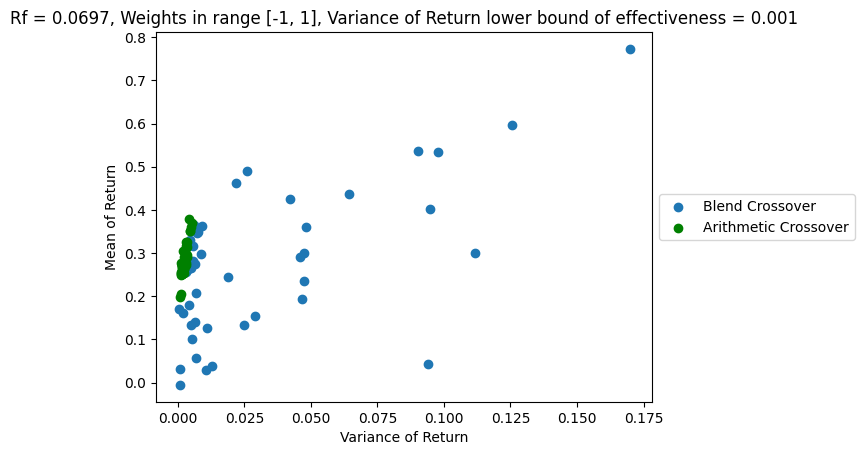

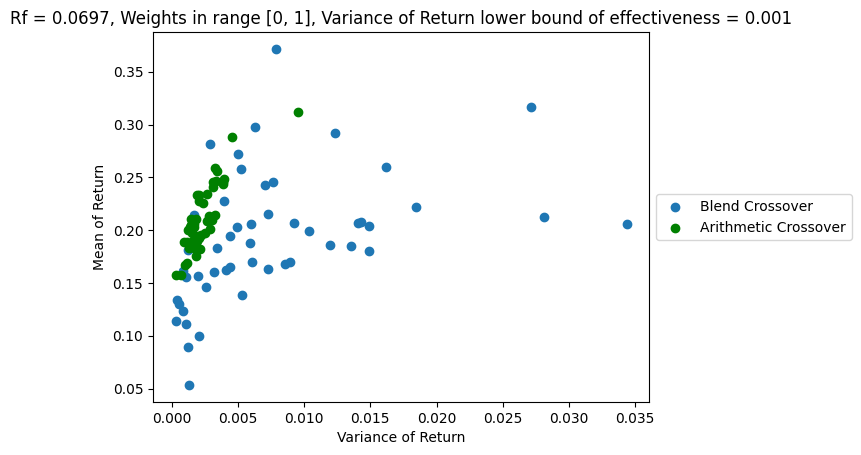

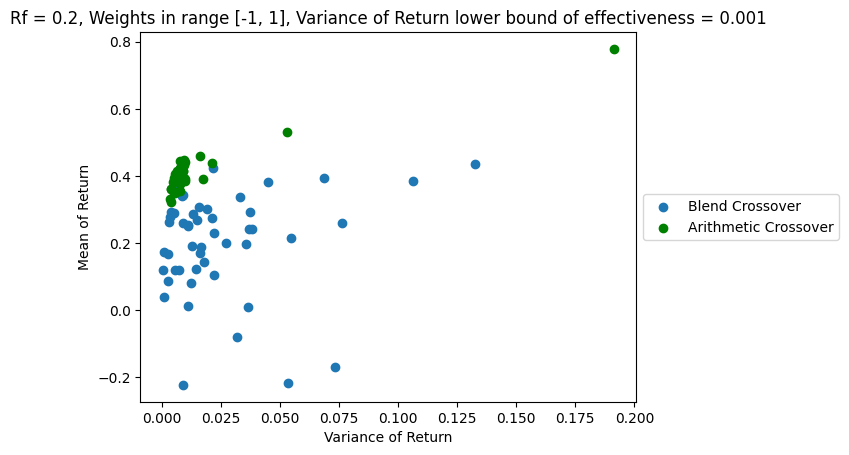

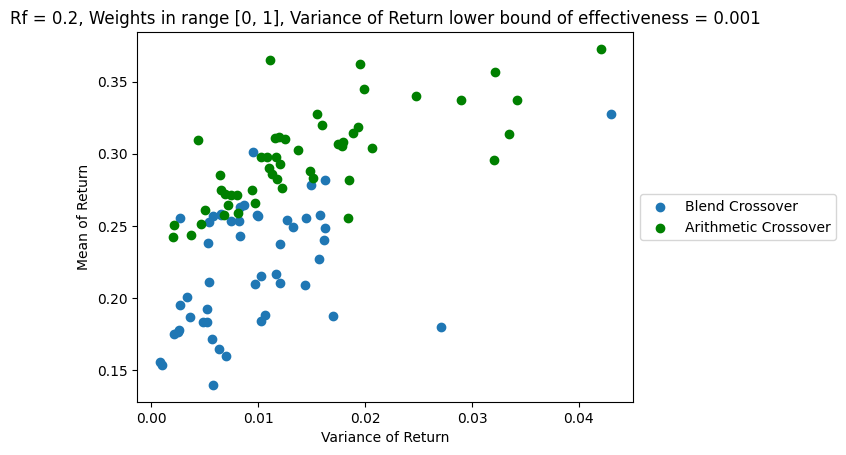

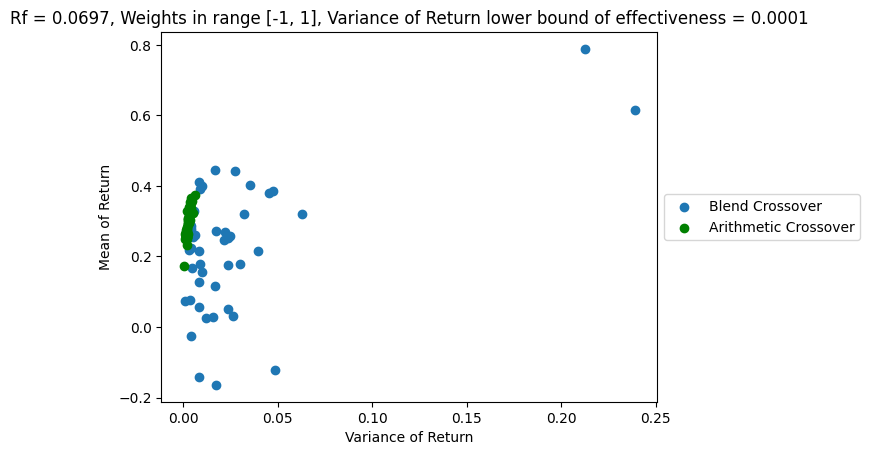

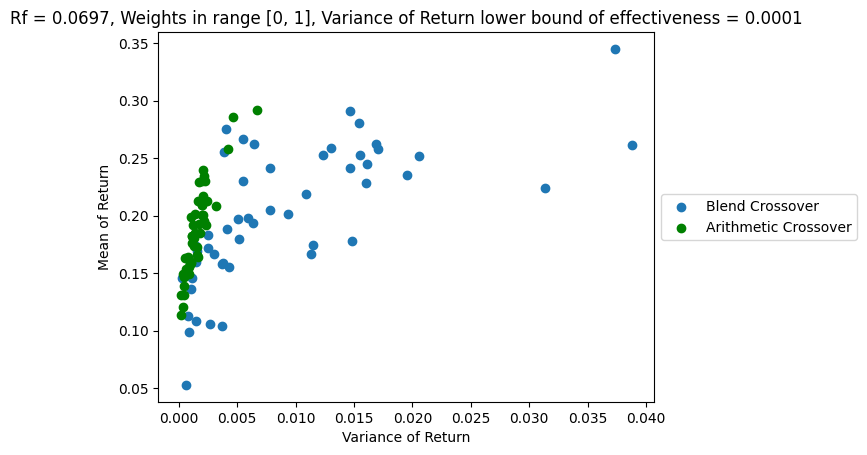

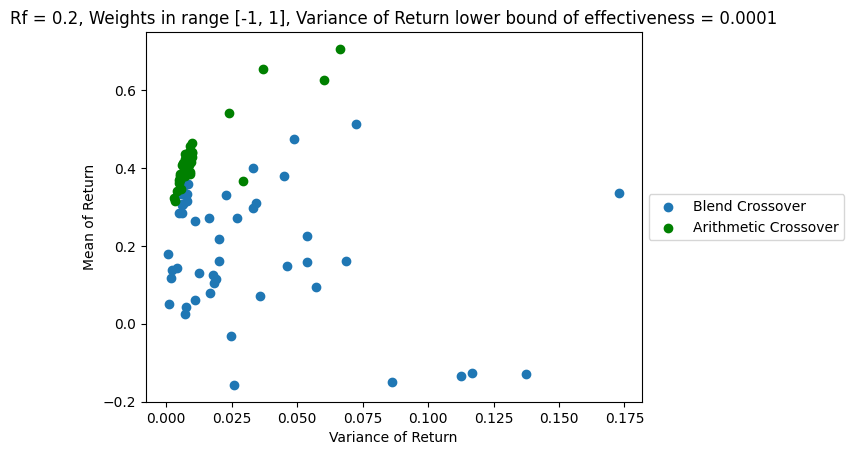

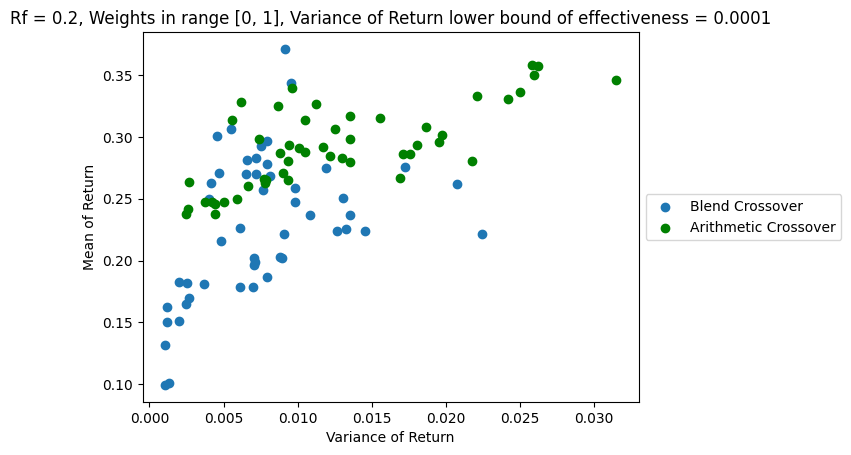

In [43]:
for i in range(8):
    plt.figure()
    plt.xlabel("Variance of Return")
    plt.ylabel("Mean of Return")
    plt.title('Rf = {}, Weights in range [{}, {}], Variance of Return lower bound of effectiveness = {}'.format(parameters[i][0], parameters[i][1], parameters[i][2], parameters[i][3]))
    plt.scatter(solutions1[i][:,0], solutions1[i][:,1], label = 'Blend Crossover')
    plt.scatter(solutions2[i][:,0], solutions2[i][:,1], color = 'g', label = 'Arithmetic Crossover')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# **It is clear that the arithmetic crossover is superior to blend crossover**